# Image processing VAMML random shape experiments
- Date: 2025-09-14 
### Overview
This notebook is made to help understand the image processing workflow for a VAMML experiment. It starts with imaging data for a previously run experiment, going through the processing steps and eventual output of processed image pairs, which can be used for training. 

Loading dependencies.

In [ ]:
# Importing Experiment class for processing.
from vamml.Batches.experiment import Experiment
# Importing pyplot for visualization.
from matplotlib import pyplot as plt
# Importing PIL.Image for other visualization.
from PIL import Image
# General directory handling.
import os

# Source directory for experiment.
src = './examples/vamml_experiment/'

First, let's visualize all of the images we have to process. Here we see several images of stained gels, as well as a calibration grid to get the actual size of the gels. Note the name of the file, 'cal grid.png', as the VAMML Experiment method keys into the filename 'cal' to identify this image by default. 

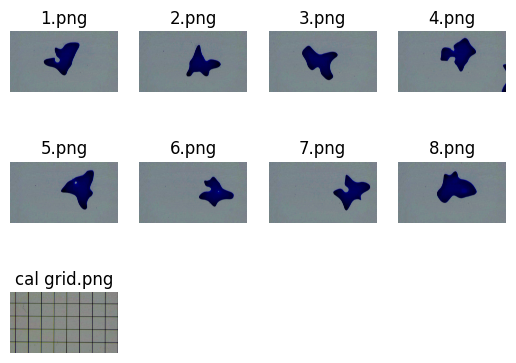

In [2]:
# Setting target folder as subfolder with images.
tgt = os.path.join(src,'images')
# Loading and sorting files
files = os.listdir(tgt)
files.sort()
# Plotting with filenames
for i,f in enumerate(files):
    plt.subplot(3,4,i+1)
    plt.imshow(Image.open(os.path.join(tgt,f)))
    plt.title(f)
    plt.axis('off')

Next let's load up the experiment from the previously prepared directory. We've set the argument of pars=True to load up parameters from directory. Since this experiment has already been prepared, a set of base shapes have been loaded from a saved array. Let's look at our template shapes.

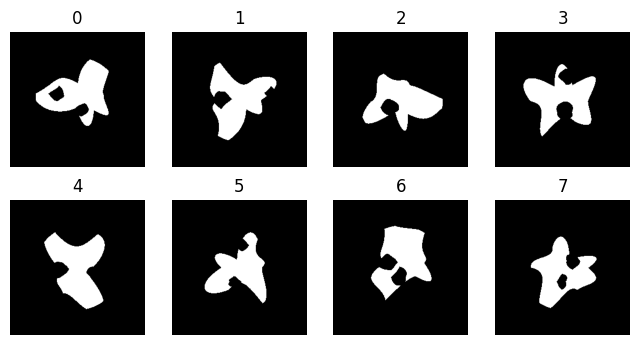

In [3]:
# Designating a new instance of Experiment class, with src directory, set to load pars.
expt = Experiment(src,pars=True)
# Plotting template shapes.
expt.plot_shapes()

Now that we've looked at our gel images, and source arrays, let's fit them together. First, we start by processing images. This works by automatically extracting regions-of-interest, by default looking for bluer objects on a lighter background. Next we fit images to template arrays, which automatically tries to find the best match and alignment. After this, we plot alignments to look at the outcomes.

Processing images |████████████████████████████████████████| 8/8 [100%] in 20.5s (0.39/s) 
Aligning images |████████████████████████████████████████| 8/8 [100%] in 0.9s (8.73/s) 


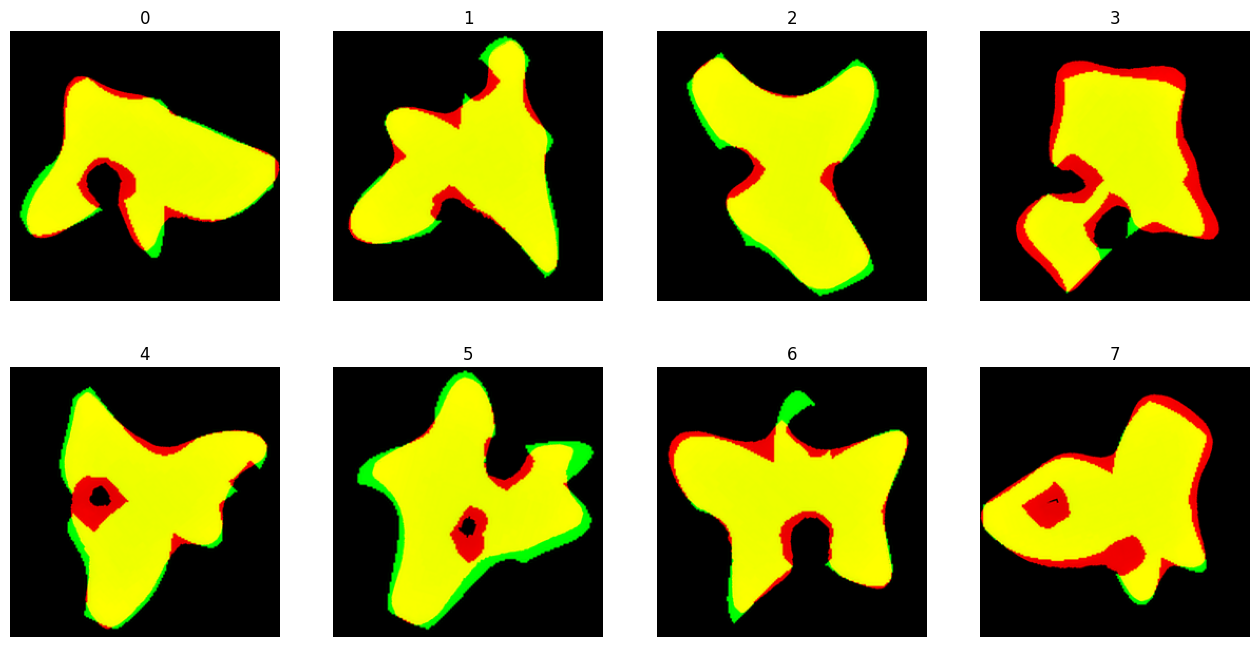

In [4]:
# Extract ROIs from gel images.
expt.process_images()
# Fit image ROIs to template shapes.
expt.fit_images()
# Visualize alignments.
expt.plot_alignments()

All of the image fits seem to look good, but if necessary we can manually re-align images, or set the experiment to skip images if it appears to be unfit for use.

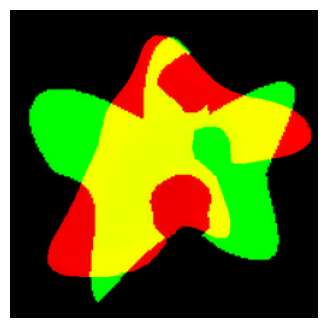

In [5]:
expt.correct_alignment(0,3,180)
expt.skip_images([1])

Since everything was correct already, let's undo these corrections.

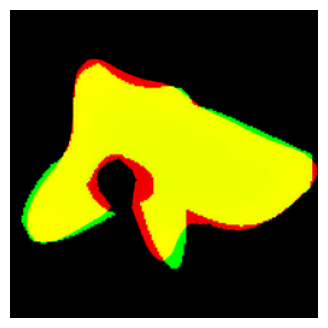

In [6]:
expt.correct_alignment(0,2,140,1)
expt.skip_images([], append=False)

Now that everything is correctly set, let's save parameters for later use.

In [7]:
expt.save_pars()

Next let's export the aligned image pairs and visualize how they turned out. The red channel represents gel ROIs, and the green channel is the template array. Note that the exported files are in real scale, as set by the voxel_size parameter. 

Exporting data |████████████████████████████████████████| 8/8 [100%] in 0.3s (26.55/s) 


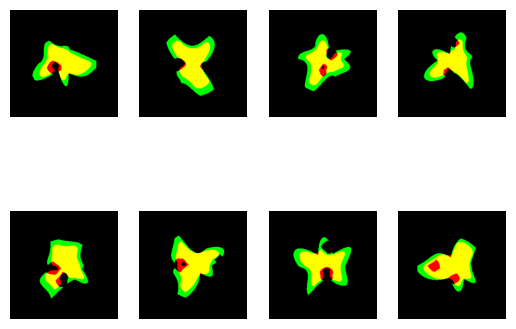

In [8]:
expt.export_alignments()
tgt = os.path.join(src,'outputs')
for i,f in enumerate(os.listdir(tgt)):
    plt.subplot(2,4,i+1)
    plt.imshow(Image.open(os.path.join(tgt,f)))
    plt.axis('off')

Let's also export relatively scaled alignments by setting an additional parameter of relative=True. This exports an image pair with the red channel transformed (translation, rotation, uniform scale) to get the best fit to green channel. This is included as a utility function for analysis or possibly alternative training data.

Exporting data |████████████████████████████████████████| 8/8 [100%] in 2.9s (2.74/s) 


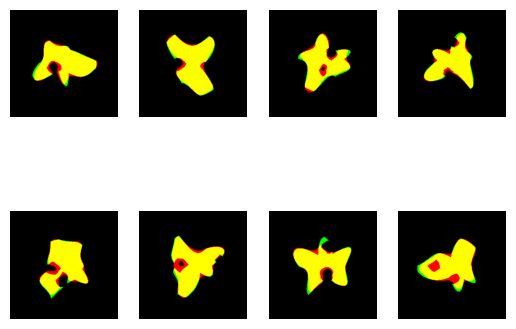

In [9]:
expt.export_alignments(relative=True)
tgt = os.path.join(src,'outputs_relative')
for i,f in enumerate(os.listdir(tgt)):
    plt.subplot(2,4,i+1)
    plt.imshow(Image.open(os.path.join(tgt,f)))
    plt.axis('off')